#### Distance Method

- Bigger beta or smaller sigma squared
- Beta be fixed
- number of interactions are fixed

#### Score method

- Same parameters as the distance method

In [12]:
from sample import simple_sample_generator
from estimators import ClusteredSegmentation
from BarcodeScanner import cluster_barcode_scanner
import pandas as pd
import numpy as np
from sklearn.metrics import auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import random
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, RocCurveDisplay
def simulation(sample_size, num_variables, beta_range = None):
    num_all_interactions = 2
    k = random.randint(1, num_all_interactions - 1)
    if beta_range:
        rng = sample_generator(num_variables, sample_size, k, beta_range = beta_range)
    else:
        rng = sample_generator(num_variables, sample_size, k)
    cluster = ClusteredSegmentation(n_clusters = 2**num_variables)
    cluster.fit(rng.barcode.reshape(-1,1), rng.y)
    scanner = cluster_barcode_scanner(rng, cluster, False) # <- need to change to False later
    scanner.set_beta_sum_range(1, 2)
#     ranking_table = scanner.get_distance_ranking(normalize = False)
    ranking_table = scanner.cdf_ranking
    true_parameters = [x.replace('X','beta') for x in rng.interactions.keys()]
    actual = ranking_table.coefficients.isin(true_parameters)
    predicted = ranking_table.ranking.isin(list(range(1, k+1)))
    return (actual.to_numpy(), predicted.to_numpy())

### Simulation 1: 

* Sample size : 5,000
* beta: Unif(3, 8) * Bern(.5) * (-1)
* Number of binary variables: 3
* Number of intercation terms: between 1 and 4
* $\sigma^2$ : 5
* Number of iterations: 200

In [4]:
# sample result
simulation(5000, 3)

(array([ True, False, False, False]), array([ True, False, False, False]))

In [5]:
from joblib import Parallel, delayed

sample_size = 5000
num_variables = 3

result = Parallel(n_jobs = -1, verbose = 10)(delayed(simulation)(
    sample_size = sample_size, num_variables = num_variables) for _ in range(200))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  

In [9]:
num_true_interactions = [np.mean(r[0]) for r in result]
prediction = np.concatenate([r[1] for r in result])
actual = np.concatenate([r[0] for r in result])

#### ROC Curve

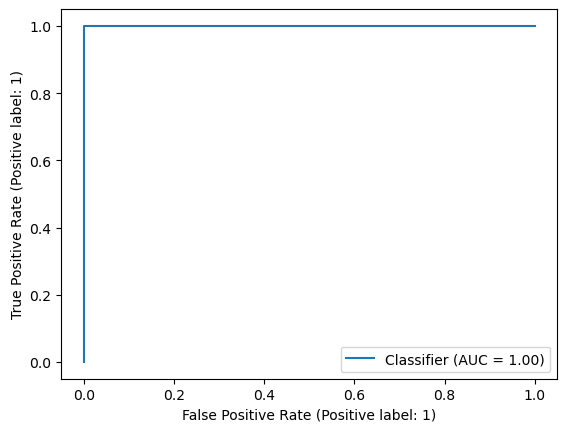

In [10]:
RocCurveDisplay.from_predictions(actual, prediction)

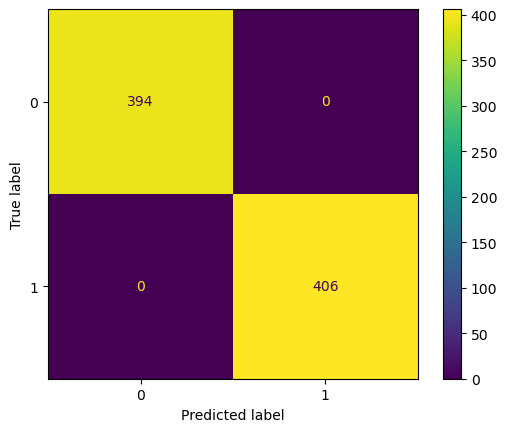

In [16]:
ds = ConfusionMatrixDisplay(confusion_matrix(actual, prediction))
ds.plot()

### Simulation 2: 

* Sample size : 5,000
* beta: Unif(3, 8) * Bern(.5) * (-1)
* Number of binary variables: 4
* Number of intercation terms: between 1 and 10
* $\sigma^2$ : 5
* Number of iterations: 200

In [17]:
sample_size = 5000
num_variables = 4

result = Parallel(n_jobs = -1, verbose = 10)(delayed(simulation)(
    sample_size = sample_size, num_variables = num_variables) for _ in range(200))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  

### ROC Curve

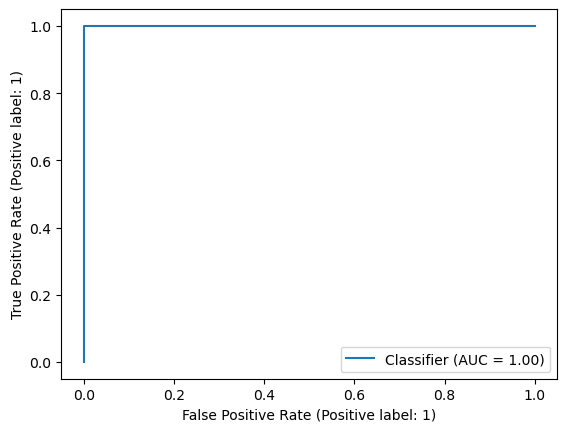

In [18]:
prediction = np.concatenate([r[1] for r in result])
actual = np.concatenate([r[0] for r in result])
RocCurveDisplay.from_predictions(actual, prediction)

### Confusion Matrix

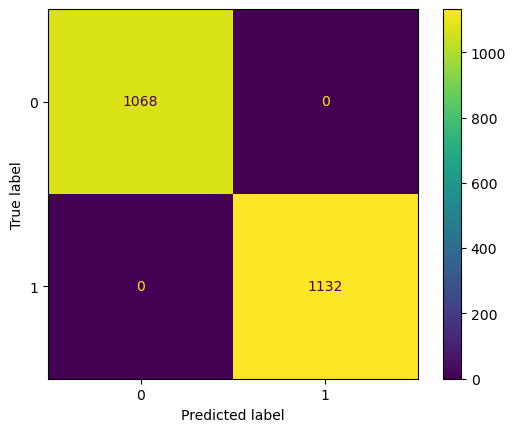

In [19]:
ds = ConfusionMatrixDisplay(confusion_matrix(actual, prediction))
ds.plot()

<AxesSubplot:ylabel='Count'>

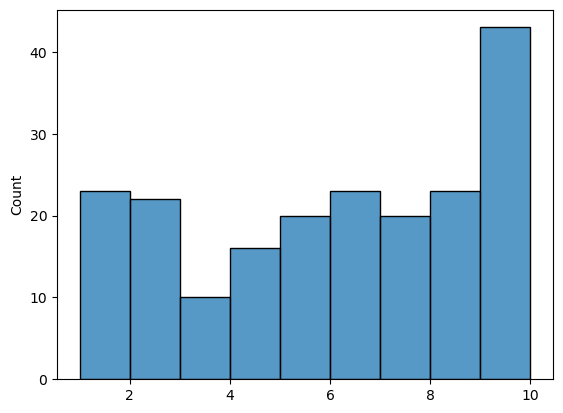

In [31]:
import seaborn as sns
num_true_interactions = [np.sum(r1) for r1, r2 in result]
sns.histplot(num_true_interactions)

## Simulation 3

* Sample size : 15,000
* beta: Unif(3, 8) * Bern(.5) * (-1)
* Number of binary variables: 5
* Number of intercation terms: between 1 and 25
* $\sigma^2$ : 5
* Number of iterations: 200

In [36]:
sample_size = 15_000
num_variables = 5

result = Parallel(n_jobs = -1, verbose = 10)(delayed(simulation)(
    sample_size = sample_size, num_variables = num_variables) for _ in range(200))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 2

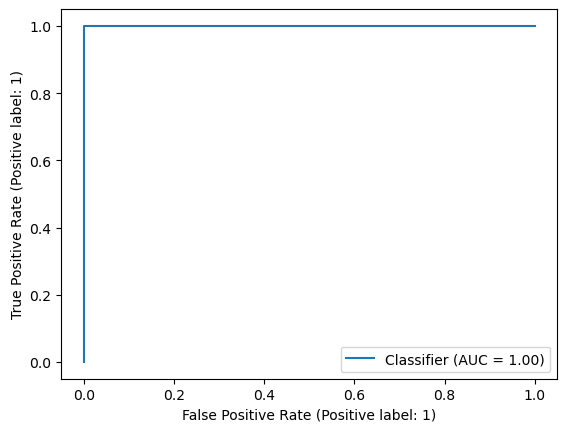

In [37]:
prediction = np.concatenate([r[1] for r in result])
actual = np.concatenate([r[0] for r in result])
RocCurveDisplay.from_predictions(actual, prediction)

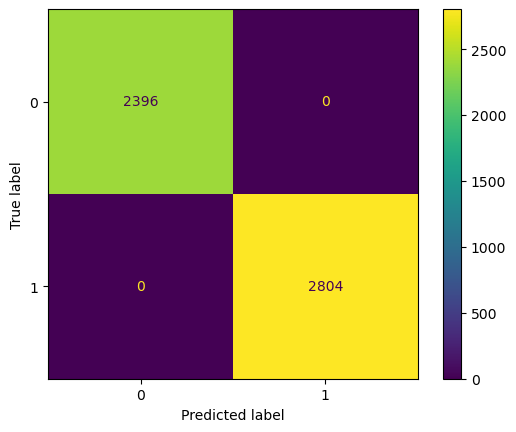

In [38]:
ds = ConfusionMatrixDisplay(confusion_matrix(actual, prediction))
ds.plot()

<AxesSubplot:ylabel='Count'>

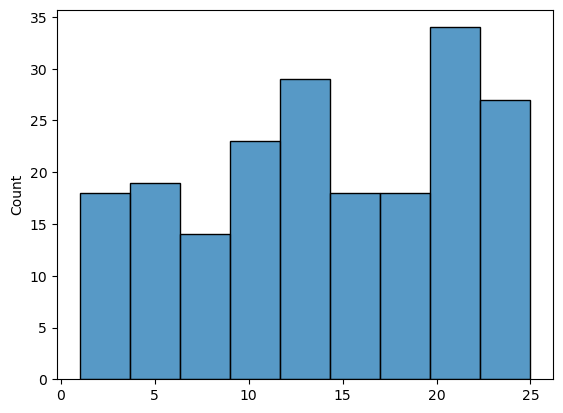

In [39]:
num_true_interactions = [np.sum(r1) for r1, r2 in result]
sns.histplot(num_true_interactions)

## Simulation 4

* Sample size : 15,000
* beta: Unif(1, 2) * Bern(.5) * (-1)
* Number of binary variables: 5
* Number of intercation terms: between 1 and 25
* $\sigma^2$ : 5
* Number of iterations: 100

In [45]:
sample_size = 15_000
num_variables = 5
beta_range = (1, 2)
result = Parallel(n_jobs = -1, verbose = 10)(delayed(simulation)(
    sample_size = sample_size, num_variables = num_variables, beta_range = beta_range) for _ in range(30))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  3.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  3.9min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  4.6min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  4.9min remaining:   32.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.2min finished


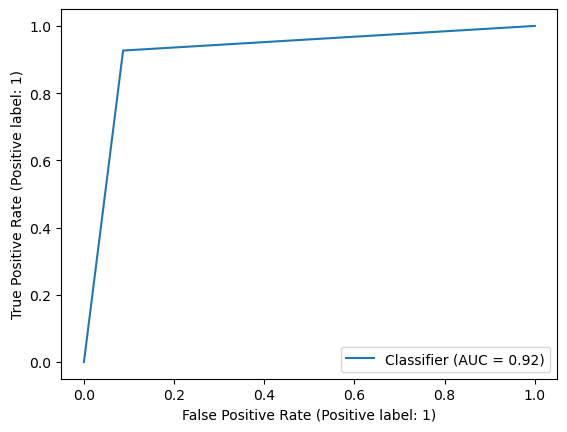

In [46]:
prediction = np.concatenate([r[1] for r in result])
actual = np.concatenate([r[0] for r in result])
RocCurveDisplay.from_predictions(actual, prediction)

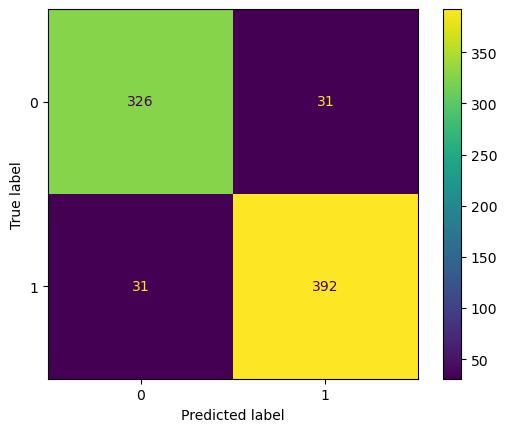

In [47]:
ds = ConfusionMatrixDisplay(confusion_matrix(actual, prediction))
ds.plot()

#### Adding hypothesis tests including three betas

In [48]:
def simulation(sample_size, num_variables, beta_range = None):
    num_all_interactions = 2**num_variables - num_variables -1
    k = random.randint(1, num_all_interactions - 1)
    if beta_range:
        rng = sample_generator(num_variables, sample_size, k, beta_range = beta_range)
    else:
        rng = sample_generator(num_variables, sample_size, k)
    cluster = ClusteredSegmentation(n_clusters = 2**num_variables)
    cluster.fit(rng.barcode.reshape(-1,1), rng.y)
    scanner = cluster_barcode_scanner(rng, cluster, False) # <- need to change to False later
    scanner.set_beta_sum_range(1, 3)
#     ranking_table = scanner.get_distance_ranking(normalize = False)
    ranking_table = scanner.cdf_ranking
    true_parameters = [x.replace('X','beta') for x in rng.interactions.keys()]
    actual = ranking_table.coefficients.isin(true_parameters)
    predicted = ranking_table.ranking.isin(list(range(1, k+1)))
    return (actual.to_numpy(), predicted.to_numpy())

In [49]:
sample_size = 15_000
num_variables = 5
beta_range = (1, 2)
result = Parallel(n_jobs = -1, verbose = 10)(delayed(simulation)(
    sample_size = sample_size, num_variables = num_variables, beta_range = beta_range) for _ in range(30))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  2.9min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  3.4min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  4.2min remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished


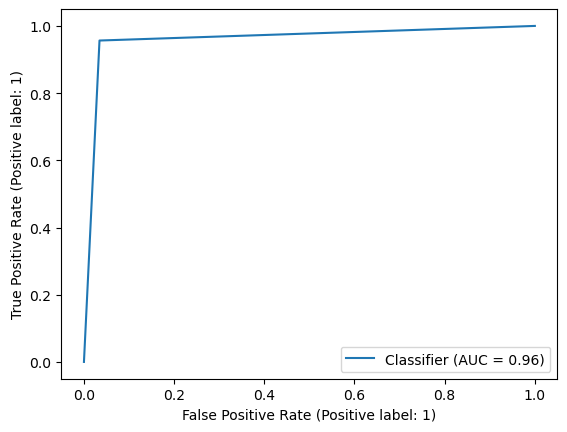

In [50]:
prediction = np.concatenate([r[1] for r in result])
actual = np.concatenate([r[0] for r in result])
RocCurveDisplay.from_predictions(actual, prediction)

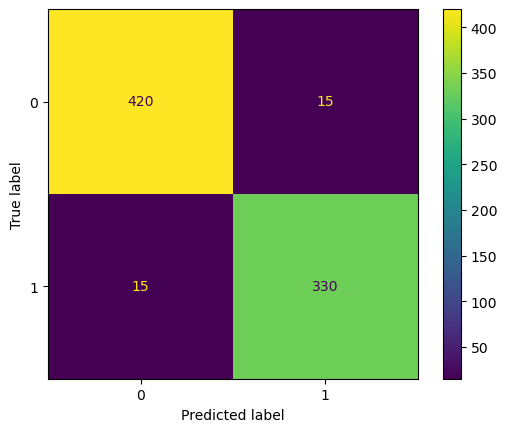

In [51]:
ds = ConfusionMatrixDisplay(confusion_matrix(actual, prediction))
ds.plot()